# This is a first tutorial of using gRPC for the automation of HyperLabs Platypus Platform on a Pulser Front End. 

### We first import all the Required Python Packages such as 'gRPC' and 'logging' as well as the gRPC "proto" files. The proto files must reside in the same directory as the jupyter notebook. An introduction to gRPC can be found here: https://grpc.io/docs/what-is-grpc/introduction/

In [2]:
import grpc
from generated.carbon_public_pb2_grpc import CarbonStub
import generated.carbon_public_pb2 as carbon_public_pb2
from generated.helium_public_pb2_grpc import HeliumStub
import generated.helium_public_pb2 as helium_public_pb2
from generated.boron_public_pb2_grpc import BoronStub
import generated.boron_public_pb2 as boron_public_pb2
import logging

# Entry.
logger = logging.getLogger("app")
logging.basicConfig(level=logging.INFO, format='[%(asctime)s] [%(name)s] [%(levelname)s] %(message)s', handlers=[logging.StreamHandler()])
host_addr = "10.1.10.226"

### As a first example of a gRPC script, we create a function that requests for the OS version running on the Platypus platform. **The IP address and the port must be updated according to the DHCP assigned IP address of the Instrument.** The port for the Carbon service is 50051. The port for the Helium Service is 50052 and for the Boron Service is 50053. Note that there might be multiple services depending on the configuration. You may find out information about all the running service by executing the following syntax by connecting to the instrument over SSH: cat /etc/hl/pulser-prod.conf

In [3]:
with grpc.insecure_channel(host_addr + ":50051") as channel:
    carbon_stub = CarbonStub(channel)
    response = carbon_stub.GetVersionId(carbon_public_pb2.GetVersionIdRequest(sys_tgt=carbon_public_pb2.SYS_TGT_SELF))
    print(f"Platypus OS Version using SemVer format: = {response.major}.{response.minor}.{response.patch}")

Platypus OS Version using SemVer format: = 1.0.0


### For the second example, let us get the pulse width set on the instrument.

In [5]:
with grpc.insecure_channel(host_addr + ":50052") as channel:
    helium_stub = HeliumStub(channel)
    response = helium_stub.GetPulseWidth(helium_public_pb2.GetPulseWidthRequest())
    print(f"The Pulse Width in seconds is: = {response.width_sec}")

The Pulse Width in seconds is: = 5e-11


### This result of 50 ps can be confirmed by you going to the Web UI and checking here. A sample screenshot is shown below.

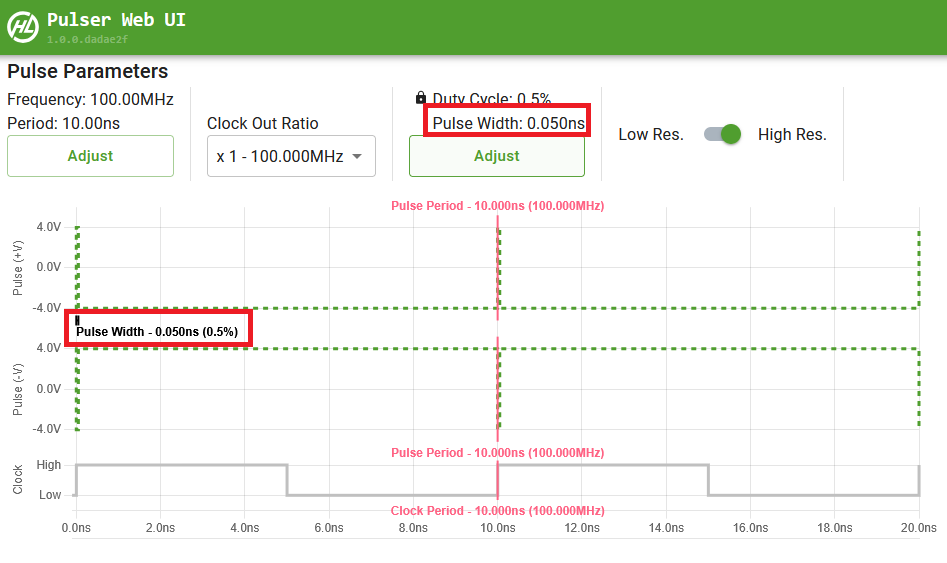

### Now let's do a final example which also uses the Helium stub to set the pulse width on the instrument. Let's set the pulse width to 1 ns.

In [6]:
with grpc.insecure_channel(host_addr + ":50052") as channel:
    helium_stub = HeliumStub(channel)
    response = helium_stub.SetPulseWidth(helium_public_pb2.SetPulseWidthRequest(width_sec=1e-9))

### Now let's get the new pulse width.

In [7]:
with grpc.insecure_channel(host_addr + ":50052") as channel:
    helium_stub = HeliumStub(channel)
    response = helium_stub.GetPulseWidth(helium_public_pb2.GetPulseWidthRequest())
    print(f"The Pulse Width in seconds is: = {response.width_sec}")

The Pulse Width in seconds is: = 1e-09


### This new result of 1ns Pulse Width can be confirmed by you going to the Web UI and checking. A sample screenshot is shown below.

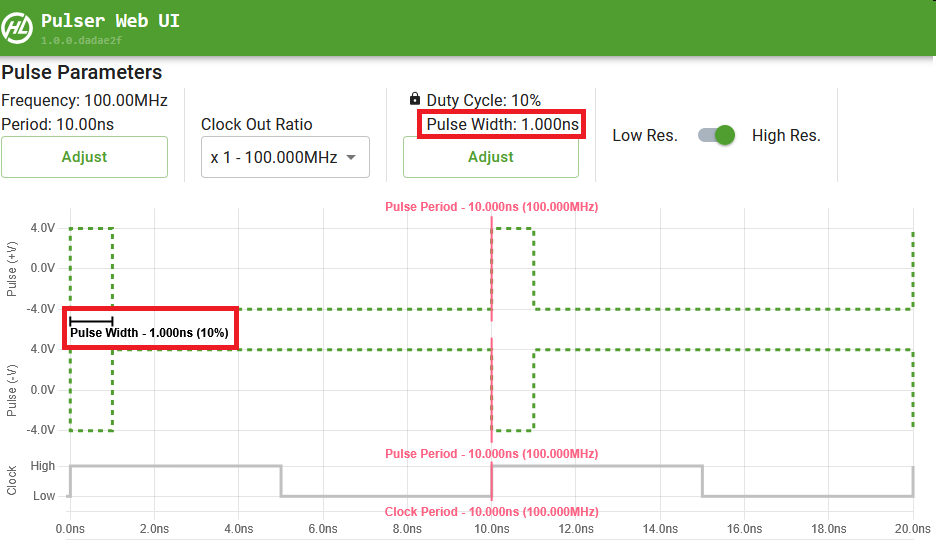

### This concludes our first tutorial of using gRPC for automation of the HyperLabs Platypus Platform